<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-09-13 02:26:27--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-09-13 02:26:27 (13.3 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [3]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.7.22-0        --> 2020.7.22-0       anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

In [4]:
#install the module for later use
!pip install pydotplus

     |████████████████████████████████| 286kB 8.4MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


### Load Data From CSV File  

In [5]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


# Data visualization and pre-processing



### Convert to date time object 

In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['effective_dayofweek'] = df['effective_date'].dt.dayofweek
df['due_dayofweek']=df['due_date'].dt.dayofweek
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,effective_dayofweek,due_dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,4
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,4
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,5
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,5


Lets plot some columns to underestand data better:

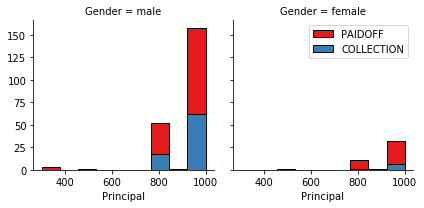

In [7]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

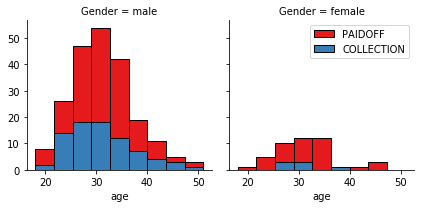

In [8]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

## Convert Categorical features to numerical values

Lets look at gender:

In [9]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [10]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,effective_dayofweek,due_dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,4
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,4
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,5
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,5


## One Hot Encoding  
#### How about other factors?

In [11]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [12]:
df.groupby(['Principal'])['loan_status'].value_counts(normalize=True)

Principal  loan_status
300        PAIDOFF        1.000000
500        PAIDOFF        1.000000
800        PAIDOFF        0.777778
           COLLECTION     0.222222
900        PAIDOFF        1.000000
1000       PAIDOFF        0.736434
           COLLECTION     0.263566
Name: loan_status, dtype: float64

In [13]:
df.groupby(['terms'])['loan_status'].value_counts(normalize=True)

terms  loan_status
7      PAIDOFF        1.000000
15     PAIDOFF        0.770270
       COLLECTION     0.229730
30     PAIDOFF        0.717391
       COLLECTION     0.282609
Name: loan_status, dtype: float64

In [14]:
df.groupby(['age'])['loan_status'].value_counts(normalize=True)

age  loan_status
18   COLLECTION     1.000000
19   PAIDOFF        1.000000
20   PAIDOFF        1.000000
21   PAIDOFF        0.800000
     COLLECTION     0.200000
22   PAIDOFF        0.714286
     COLLECTION     0.285714
23   PAIDOFF        0.750000
     COLLECTION     0.250000
24   PAIDOFF        0.714286
     COLLECTION     0.285714
25   PAIDOFF        0.625000
     COLLECTION     0.375000
26   PAIDOFF        0.689655
     COLLECTION     0.310345
27   PAIDOFF        0.760000
     COLLECTION     0.240000
28   PAIDOFF        0.750000
     COLLECTION     0.250000
29   PAIDOFF        0.777778
     COLLECTION     0.222222
30   PAIDOFF        0.740741
     COLLECTION     0.259259
31   PAIDOFF        0.842105
     COLLECTION     0.157895
32   PAIDOFF        0.642857
     COLLECTION     0.357143
33   PAIDOFF        0.823529
     COLLECTION     0.176471
34   PAIDOFF        0.800000
     COLLECTION     0.200000
35   PAIDOFF        0.800000
     COLLECTION     0.200000
36   PAIDOFF        0.8888

#### Feature befor One Hot Encoding

In [15]:
df['effective_dayofweek']=df['effective_dayofweek'].apply(lambda x: 1 if (x>3) else 0)
df.groupby(['effective_dayofweek'])['loan_status'].value_counts(normalize=True)

effective_dayofweek  loan_status
0                    PAIDOFF        0.978723
                     COLLECTION     0.021277
1                    PAIDOFF        0.595122
                     COLLECTION     0.404878
Name: loan_status, dtype: float64

In [16]:
df.groupby(['due_dayofweek'])['loan_status'].value_counts(normalize=True)

due_dayofweek  loan_status
0              PAIDOFF        0.718519
               COLLECTION     0.281481
1              PAIDOFF        0.941176
               COLLECTION     0.058824
2              PAIDOFF        0.826087
               COLLECTION     0.173913
3              PAIDOFF        0.958333
               COLLECTION     0.041667
4              PAIDOFF        0.625000
               COLLECTION     0.375000
5              PAIDOFF        0.761905
               COLLECTION     0.238095
6              PAIDOFF        0.619048
               COLLECTION     0.380952
Name: loan_status, dtype: float64

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [17]:
df_adj=df[:]
df_adj=df_adj.iloc[:][df_adj.Principal>500]
df_adj=df_adj.iloc[:][df_adj.age>20]

In [18]:
Feature = df_adj[['Principal','terms','age','Gender','effective_dayofweek','due_dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df_adj['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,effective_dayofweek,due_dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,4,0,1,0
1,1000,30,33,1,0,4,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,5,0,0,1
4,1000,30,29,0,1,5,0,0,1


### Feature selection

Lets defind feature sets and labels, X,y:

In [19]:
X = Feature
y = df_adj['loan_status'].values
print(X[0:5])
print(y[0:5])

   Principal  terms  age  Gender  effective_dayofweek  due_dayofweek  \
0       1000     30   45       0                    0              4   
1       1000     30   33       1                    0              4   
2       1000     15   27       0                    0              3   
3       1000     30   28       1                    1              5   
4       1000     30   29       0                    1              5   

   Bechalor  High School or Below  college  
0         0                     1        0  
1         1                     0        0  
2         0                     0        1  
3         0                     0        1  
4         0                     0        1  
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.57161945,  0.91991273,  2.34668759, -0.41885391, -1.22474487,
         0.66057542, -0.38884798,  1.14470294, -0.86828953],
       [ 0.57161945,  0.91991273,  0.30122269,  2.38746728, -1.22474487,
         0.66057542,  2.57169912, -0.87358909, -0.86828953],
       [ 0.57161945, -0.99023664, -0.72150976, -0.41885391, -1.22474487,
         0.25968273, -0.38884798, -0.87358909,  1.15168958],
       [ 0.57161945,  0.91991273, -0.55105435,  2.38746728,  0.81649658,
         1.06146811, -0.38884798, -0.87358909,  1.15168958],
       [ 0.57161945,  0.91991273, -0.38059894, -0.41885391,  0.81649658,
         1.06146811, -0.38884798, -0.87358909,  1.15168958]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=1)
print('train set: ', X_train.shape, y_train.shape)
print("test set: ", X_test.shape, y_test.shape)

train set:  (268, 9) (268,)
test set:  (67, 9) (67,)


# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [24]:
param_grid_knn={"n_neighbors":list(range(1,11))}

In [25]:
#GridSearchCV
knn_gs=GridSearchCV(estimator=KNeighborsClassifier(), param_grid = param_grid_knn, cv=5)
knn_gs.fit(X_train,y_train)
print("Best params: {} and its accuracy={:.4f}".format(knn_gs.best_params_,knn_gs.best_score_))

Best params: {'n_neighbors': 9} and its accuracy=0.7500


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


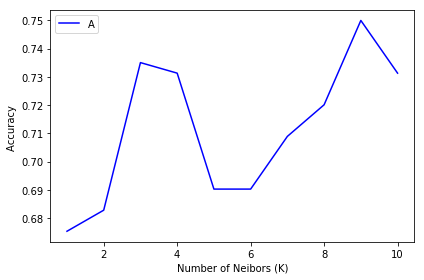

In [26]:
plt.plot(range(1,11),knn_gs.cv_results_['mean_test_score'],'b')
plt.legend('Accuracy')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neibors (K)')
plt.tight_layout()
plt.show()

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
param_grid_Dtree={"max_depth":list(range(1,11)),"criterion":["entropy"]}

In [29]:
#GridSearchGrid
Dtree_gs=GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = param_grid_Dtree, cv=5)
Dtree_gs.fit(X_train,y_train)
print("Best params: {} and its accuracy= {:.4f}".format(Dtree_gs.best_params_,Dtree_gs.best_score_))

Best params: {'criterion': 'entropy', 'max_depth': 1} and its accuracy= 0.7575


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [31]:
Tree=DecisionTreeClassifier(criterion="entropy",max_depth=1)
Tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

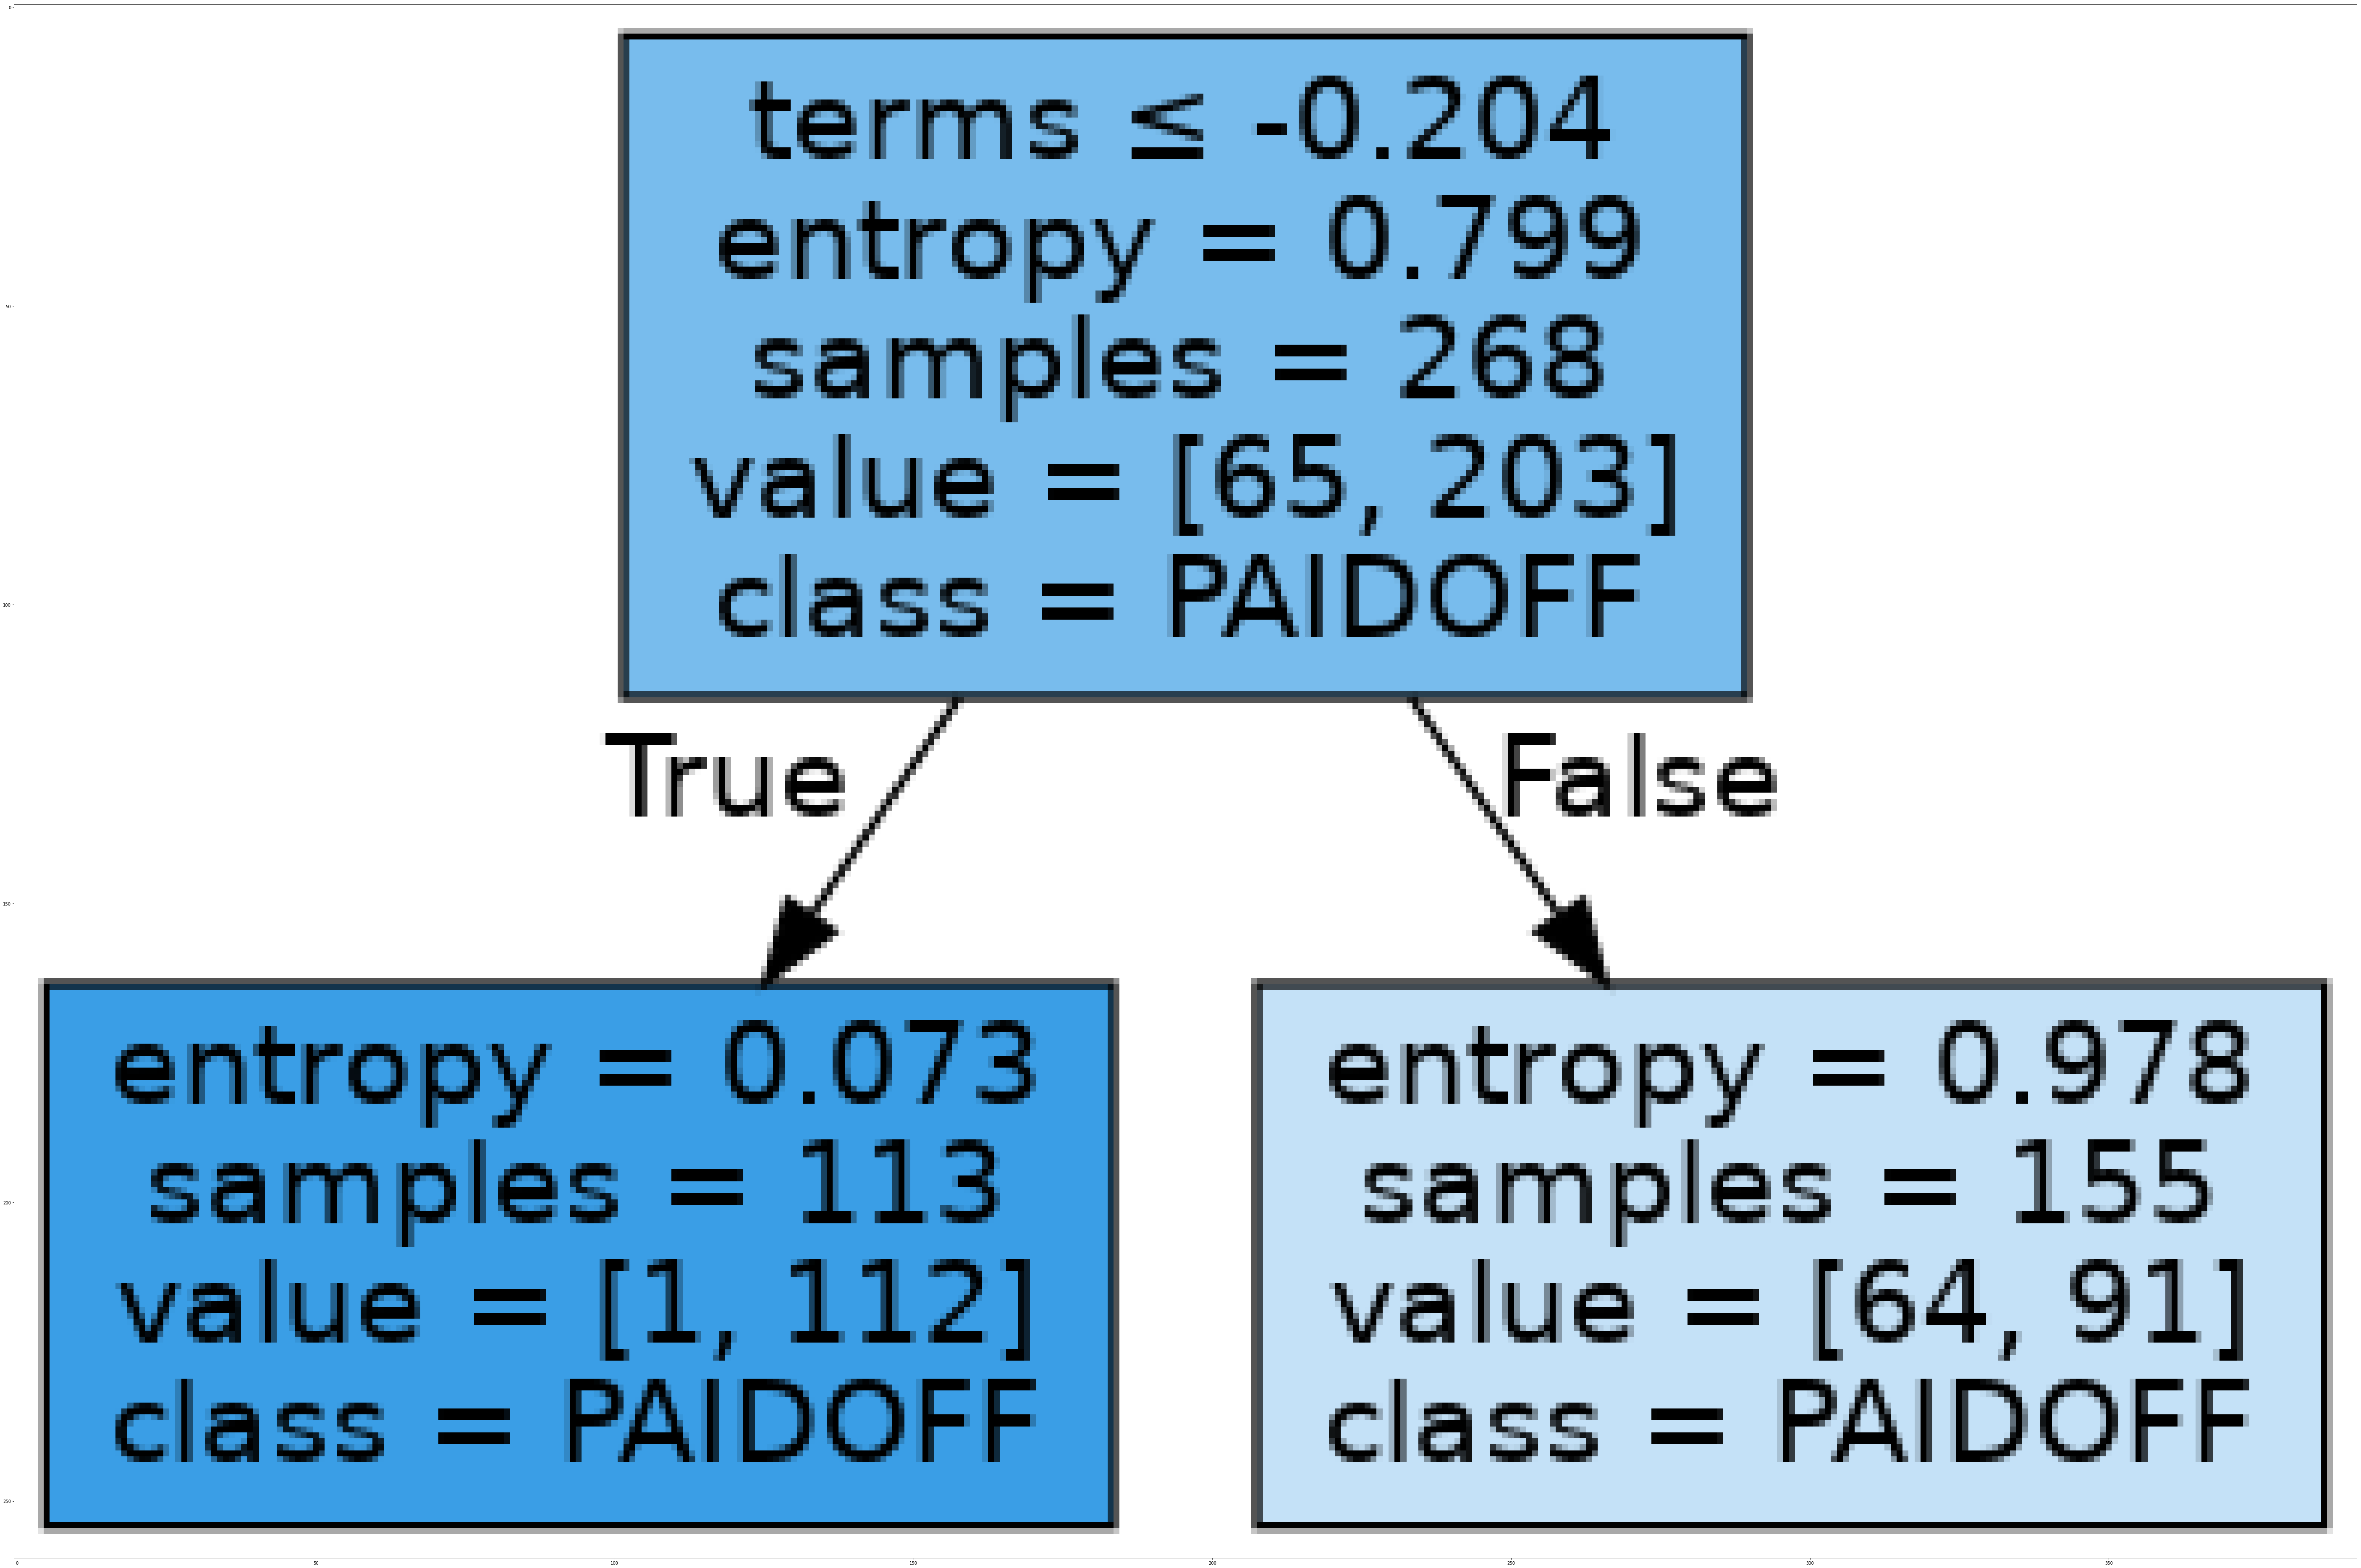

In [32]:
dot_data = StringIO()
filename = "Tree.png"
featureNames = df_adj.columns[0:9]
targetNames = df_adj['loan_status'].unique().tolist()
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names=np.unique(y_train), filled=True, special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename) 
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

In [33]:
from sklearn import svm
from sklearn.metrics import f1_score

In [34]:
params_svm={'C':np.logspace(-3,2,num=6),'gamma':np.logspace(-3,2,num=6)}

In [35]:
#GridsearchCV: use estimator svc
from sklearn.model_selection import GridSearchCV
svm_gs=GridSearchCV(estimator=svm.SVC(), param_grid = params_svm, cv = 5)
svm_gs.fit(X_train,y_train)
print('Best parameters {:} and its accuracy = {:.3f}'.format(svm_gs.best_params_, svm_gs.best_score_))

Best parameters {'C': 0.001, 'gamma': 0.001} and its accuracy = 0.757


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [37]:
y_logis=df_adj['loan_status'].map({"PAIDOFF":1, "COLLECTION":0})

In [38]:
X_train,X_test,y_train_logis,y_test_logis=train_test_split(X,y_logis,test_size=0.2,random_state=2)
print('train set: ', X_train.shape, y_train_logis.shape)
print("test set: ", X_test.shape, y_test_logis.shape)

train set:  (268, 9) (268,)
test set:  (67, 9) (67,)


In [39]:
param_logis={"C":list([0.001,0.005,0.0001,0.00001])}

In [40]:
logis_gs=GridSearchCV(estimator=LogisticRegression(), param_grid = param_logis, cv = 5)
logis_gs.fit(X_train,y_train_logis)
print('Best parameters {:} and its accuracy = {:.3f}'.format(logis_gs.best_params_, logis_gs.best_score_))

Best parameters {'C': 0.0001} and its accuracy = 0.690


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

# Model Evaluation using Test set

First, download and load the test set:

In [41]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-09-13 02:29:44--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-09-13 02:29:44 (349 MB/s) - ‘loan_test.csv’ saved [3642/3642]



## Load Test set for evaluation
### Preprocessing test set data

In [42]:
test_df = pd.read_csv('loan_test.csv')
#change date to datatime
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
#calculate the dayofweek
test_df['effective_dayofweek']=test_df['effective_date'].dt.dayofweek
test_df['due_dayofweek']=df['due_date'].dt.dayofweek
test_df['effective_dayofweek'] = test_df['effective_dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
#replace gender into male:0,female:1
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,effective_dayofweek,due_dayofweek
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,0,4
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,1,4
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,1,3
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,1,5
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,1,5


In [43]:
test_Feature = test_df[['Principal','terms','age','Gender','effective_dayofweek','due_dayofweek']]
test_Feature = pd.concat([test_Feature, pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_Feature.head()

,Principal,terms,age,Gender,effective_dayofweek,due_dayofweek,Bechalor,High School or Below,college
0,1000,30,50,1,0,4,1,0,0
1,300,7,35,0,1,4,0,0,0
2,1000,30,43,1,1,3,0,1,0
3,1000,30,26,0,1,5,0,0,1
4,800,15,29,0,1,5,1,0,0


In [44]:
# test set train data
t_X=test_Feature
t_X=preprocessing.StandardScaler().fit(t_X).transform(t_X)
# test set target data
t_y=test_df['loan_status']

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [45]:
def score(y_true,y_eval):
    f1score=f1_score(y_true, y_eval, average='weighted')
    jac_score=jaccard_similarity_score(y_true,y_eval)
    return [f1score, jac_score]

### KNN

In [46]:
#testset evaluate
y_eval=knn_gs.predict(t_X)
knn_score=score(t_y,y_eval)

### DecisionTree

In [47]:
#testset evaluate
y_eval=Dtree_gs.predict(t_X)
Dtree_score=score(t_y,y_eval)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### SVM

In [48]:
#testset evaluate
y_eval=svm_gs.predict(t_X)
SVM_score=score(t_y,y_eval)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### LogisReg

In [49]:
#LogisticRegression
t_y_logis=t_y.copy().map({'PAIDOFF':1,'COLLECTION':0})
#best
LR=LogisticRegression(C=logis_gs.best_params_['C'],solver='liblinear').fit(X_train,y_train_logis)
#testset evaluate
y_eval=logis_gs.predict(t_X)
y_eval_proba=logis_gs.predict_proba(t_X)
llss=log_loss(t_y_logis, y_eval_proba)

LR_score=score(t_y_logis,y_eval)
LR_score.append(llss)

### Final result DF

In [50]:
knn_score=pd.Series(knn_score)
Dtree_score=pd.Series(Dtree_score)
SVM_score=pd.Series(SVM_score)
LR_score=pd.Series(LR_score)

In [51]:
_pd=pd.DataFrame([knn_score,Dtree_score,SVM_score,LR_score])
_pd.index=["KNN","DecisionTree","SVM","Logistic Regression"]
_pd.columns=["Jaccard","F1-scor","LogLoss"]
_pd

,Jaccard,F1-scor,LogLoss
KNN,0.740741,0.740741,NaN
DecisionTree,0.630418,0.740741,NaN
SVM,0.630418,0.740741,NaN
Logistic Regression,0.728821,0.759259,0.690795


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.740741       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>